In [48]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from random import uniform

% matplotlib inline

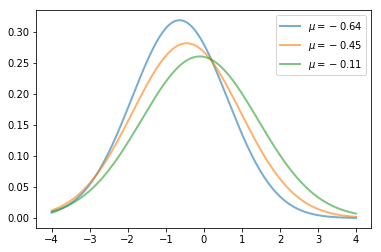

In [49]:
fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = r'$\mu = {0:.2f}$'.format(m)
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show()

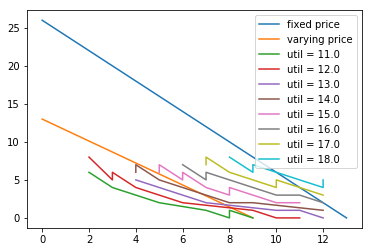

In [178]:
fig, ax = plt.subplots()

good_a_label = "Y"
good_b_label = "X"

good_a_price_fix = 0.75
good_b_price_fix = 1.5

total_spending_budget = 10

good_a_utility = 1.
good_b_utility = 0.8

good_a_utility_dec_fac = 0.9
good_b_utility_dec_fac = 0.9

initial_budget_constraint_x_fixed = np.linspace(0, np.int(total_spending_budget/good_b_price_fix), 1250)
initial_budget_constraint_y_fixed = np.linspace(np.int(total_spending_budget/good_a_price_fix), 0, 1250)

ax.plot(initial_budget_constraint_x_fixed,initial_budget_constraint_y_fixed, label="fixed price")



good_a_label = "Y"
good_b_label = "X"

good_a_price = 0.75
good_b_price = 1.05

total_spending_budget = 10

initial_budget_constraint_x = np.linspace(0, np.int(total_spending_budget/good_b_price), 1250)
initial_budget_constraint_y = np.linspace(np.int(total_spending_budget/good_a_price), 0, 1250)

ax.plot(initial_budget_constraint_x,initial_budget_constraint_y, label="varying price")

utility_list = []

for i in range(int(total_spending_budget/good_a_price)):
    for j in range(int(total_spending_budget/good_b_price)):
        
        a_present = i > 0
        b_present = j > 0
        tw_a = i > 1
        tw_b = j > 1
        
        if i != 0 or j != 0:
            utility = np.round(good_a_utility*a_present - good_a_utility*15*(good_a_utility_dec_fac**i-1)*tw_a + 
                               good_b_utility*b_present - good_b_utility*15*(good_b_utility_dec_fac**j-1)*tw_b
                               ,0)

            utility_list.append((i, j, utility))

utility_list = np.array(sorted(utility_list, key=lambda x: x[2]))
# print(np.array(utility_list))

prev_util = utility_list[0,2]
curr_x = []
curr_y = []

for i in range(1,len(utility_list)):
    if utility_list[i,2] == prev_util:
        curr_x.append(utility_list[i,0])
        curr_y.append(utility_list[i,1])
    else:
        prev_util = utility_list[i,2]
        if len(curr_x) > 5:
            ax.plot(curr_x,curr_y,label="util = "+str(utility_list[i,2]))
        curr_x = []
        curr_y = []
            


ax.legend()
plt.show()